# Assignment Cerina Health

## Preprocessing the Dataset

In [1]:
# importing libraries
import pandas as pd

In [2]:
# Load the dataset from Excel file
df = pd.read_excel("Homestays_Data.xlsx")

In [3]:
# Display the first few rows of the dataset
print(df.head())

         id  log_price property_type        room_type   
0   6901257   5.010635     Apartment  Entire home/apt  \
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms   
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0  \
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude   
0  Real Bed              strict          True  ...  40.696524  -73.991617  \
1  Real Bed     

In [4]:
# Check for missing values
print(df.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

### Task:1 Feature Engineering: 

In [8]:
# Convert date columns to datetime format
date_columns = ['first_review', 'host_since', 'last_review']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [9]:
# Calculate Host_Tenure
current_date = pd.to_datetime('now')
df['Host_Tenure'] = (current_date - df['host_since']).dt.days / 365

In [10]:
# Generate Amenities_Count
df['Amenities_Count'] = df['amenities'].apply(lambda x: len(x.split(',')))

In [11]:
# Determine Days_Since_Last_Review
df['Days_Since_Last_Review'] = (current_date - df['last_review']).dt.days

In [12]:
# Drop unnecessary columns
columns_to_drop = ['id', 'thumbnail_url']  
df.drop(columns=columns_to_drop, inplace=True)

### Task:2 EDA

In [14]:
# Save the cleaned dataset
df.to_excel("cleaned_homestays_data.xlsx", index=False)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Summary statistics for numerical features
print("Summary statistics for numerical features:")
print(df.describe())

Summary statistics for numerical features:
          log_price  accommodates     bathrooms   
count  38496.000000  38496.000000  38496.000000  \
mean       4.745528      3.233557      1.215178   
min        0.000000      1.000000      0.000000   
25%        4.304065      2.000000      1.000000   
50%        4.700480      2.000000      1.000000   
75%        5.164786      4.000000      1.000000   
max        7.600402     16.000000      8.000000   
std        0.658017      2.137397      0.551358   

                        first_review  host_response_rate   
count                          38496        38496.000000  \
mean   2016-01-30 04:16:07.331670784            0.961435   
min              2009-01-20 00:00:00            0.000000   
25%              2015-06-19 00:00:00            1.000000   
50%              2016-06-25 00:00:00            1.000000   
75%              2017-02-23 00:00:00            1.000000   
max              2017-10-05 00:00:00            1.000000   
std              

In [17]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate correlation matrix for numerical columns
corr_matrix = df[numerical_columns].corr()

# Print correlation matrix
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                        log_price  accommodates  bathrooms   
log_price                1.000000      0.582050   0.306575  \
accommodates             0.582050      1.000000   0.459566   
bathrooms                0.306575      0.459566   1.000000   
host_response_rate       0.006566      0.040705   0.015784   
latitude                 0.000837     -0.044120  -0.108320   
longitude               -0.058213     -0.052754  -0.112411   
number_of_reviews       -0.012976      0.013740  -0.047014   
review_scores_rating     0.077483     -0.041992  -0.004441   
bedrooms                 0.480815      0.716626   0.528305   
beds                     0.447050      0.824816   0.480187   
Host_Tenure              0.076962     -0.030315  -0.005562   
Amenities_Count          0.227548      0.241319   0.143921   
Days_Since_Last_Review  -0.013910     -0.005246   0.079067   

                        host_response_rate  latitude  longitude   
log_price                         0.006566  

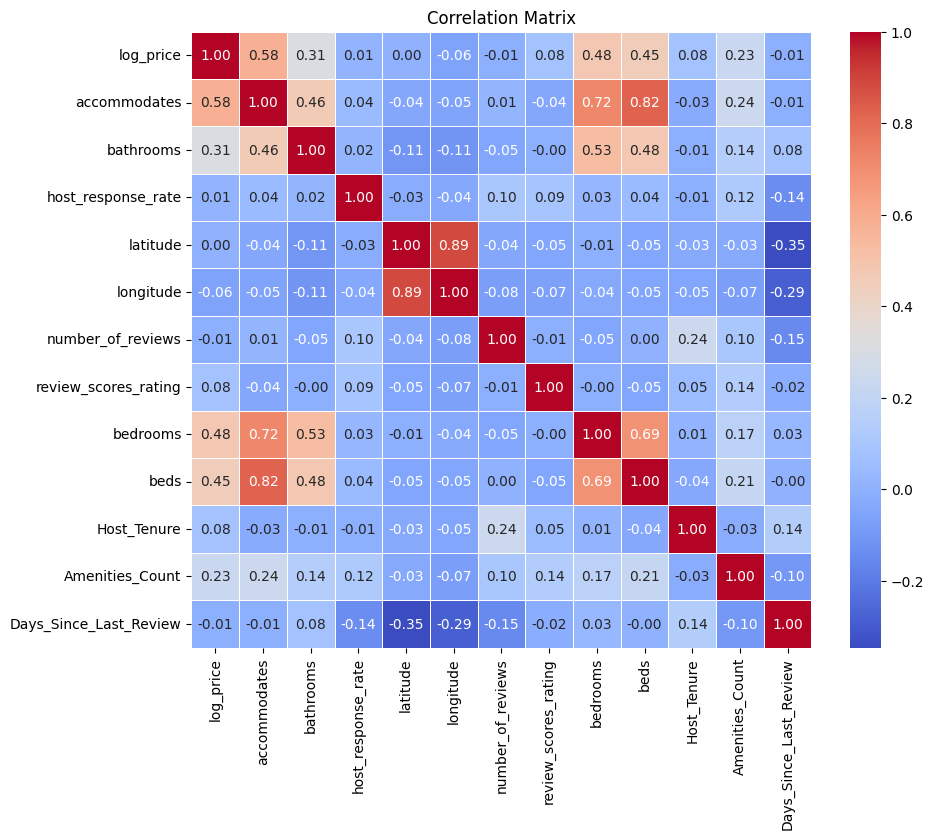

In [18]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

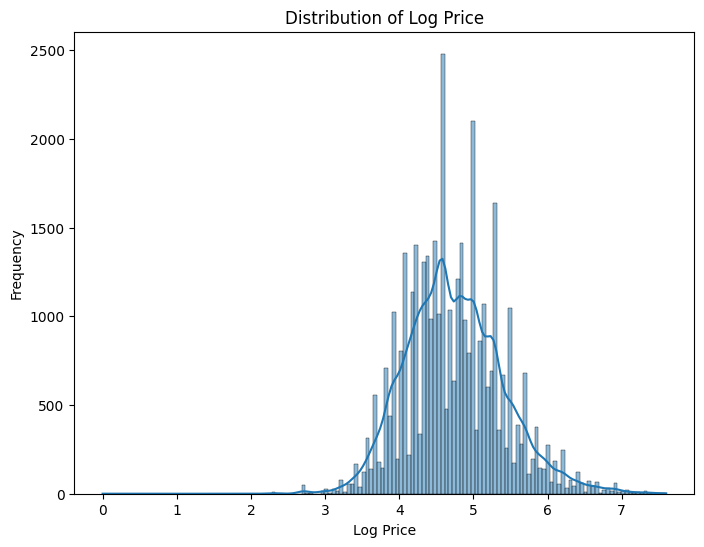

In [19]:
# Distribution of log_price
plt.figure(figsize=(8, 6))
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

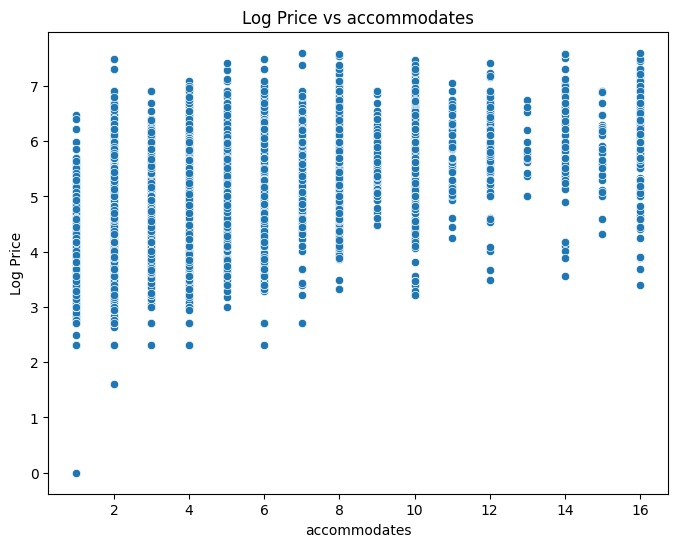

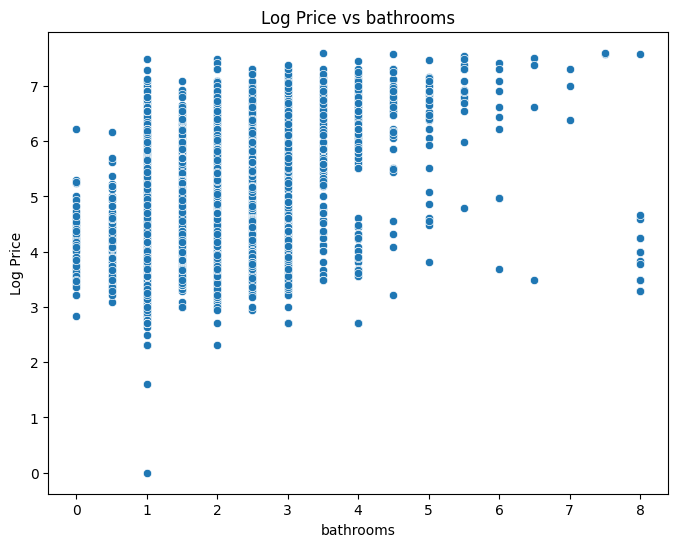

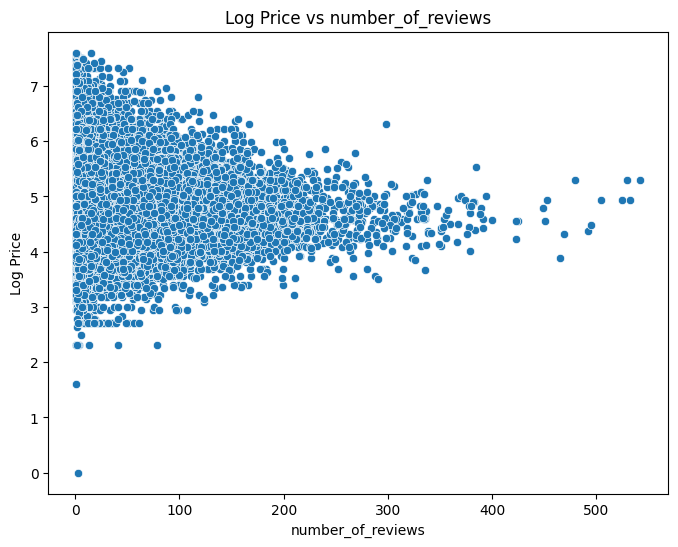

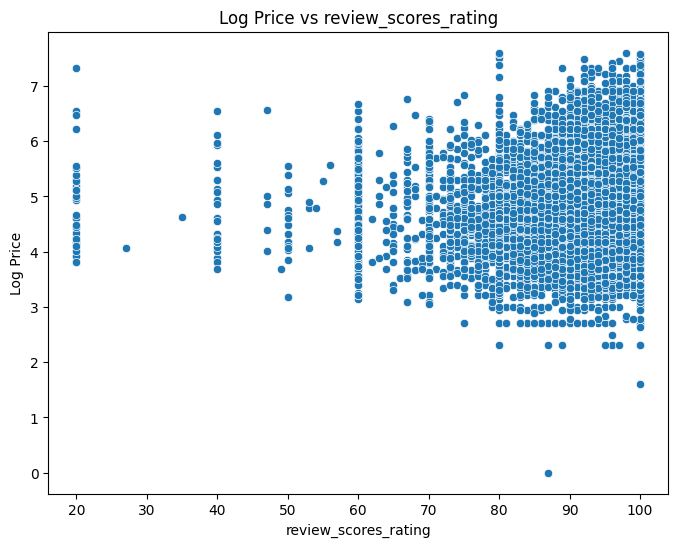

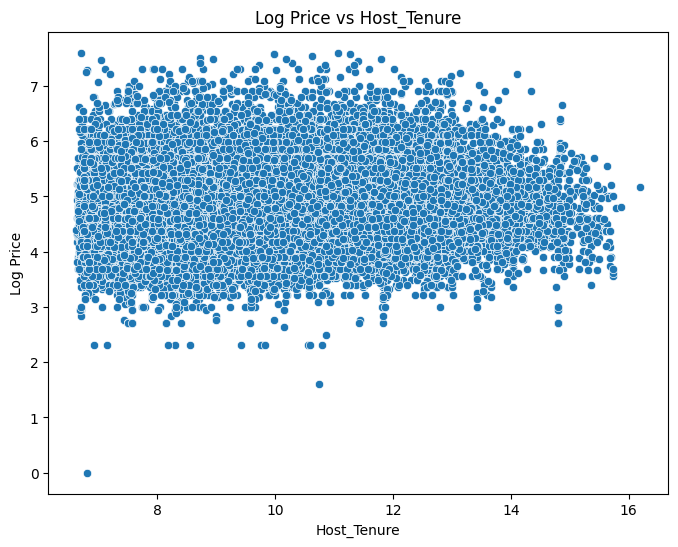

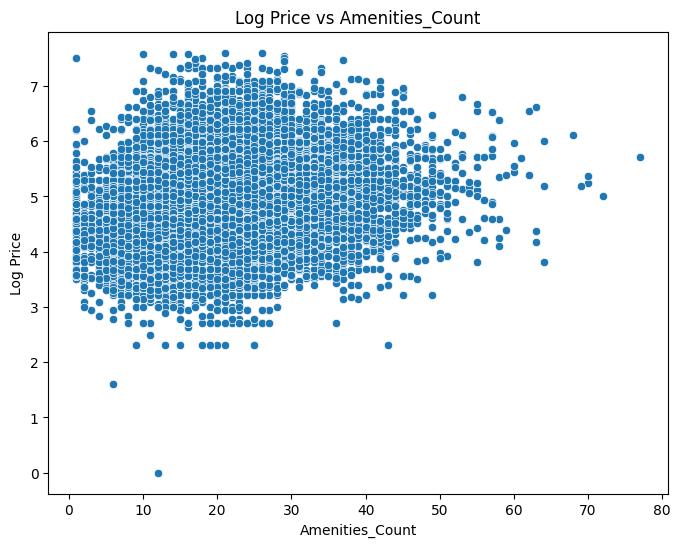

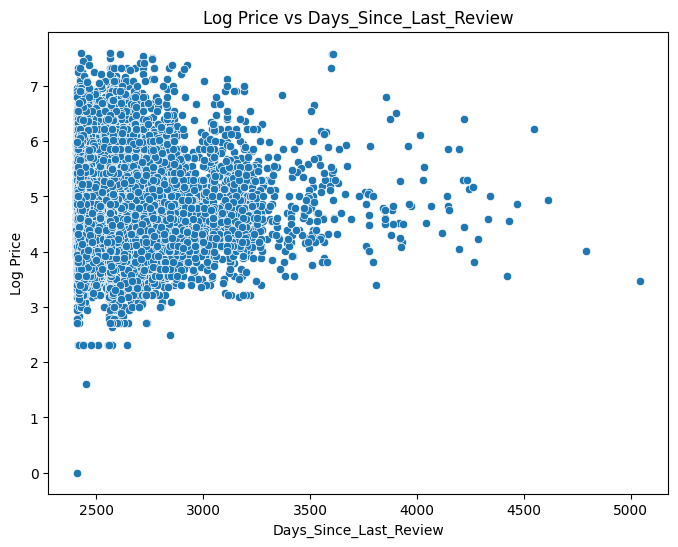

In [20]:

# Scatter plot of log_price vs. numerical features
numerical_features = ['accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 
                      'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='log_price', data=df)
    plt.title(f'Log Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Log Price')
    plt.show()

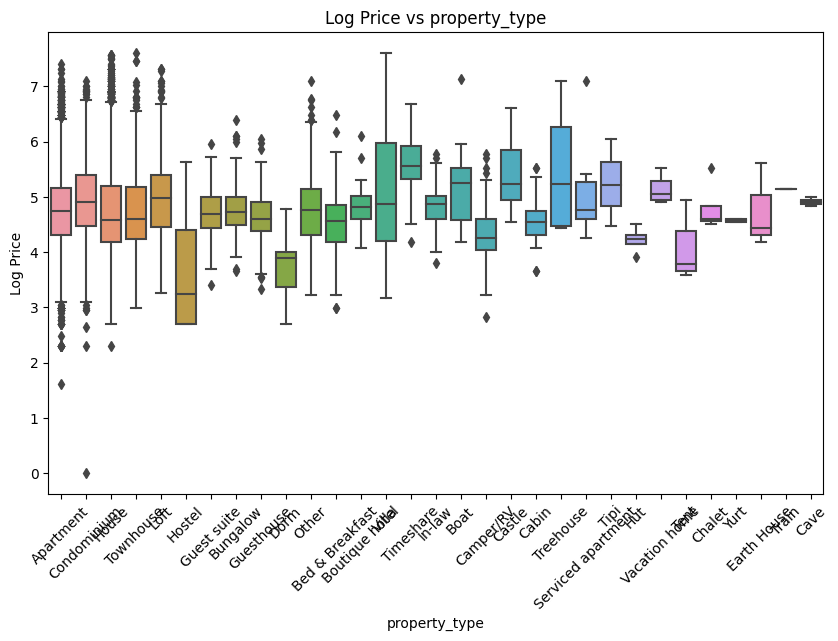

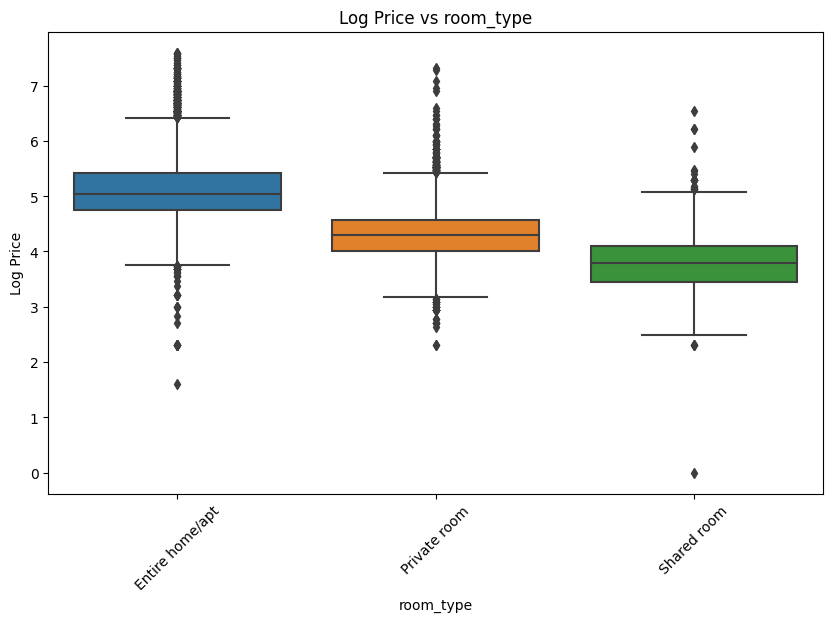

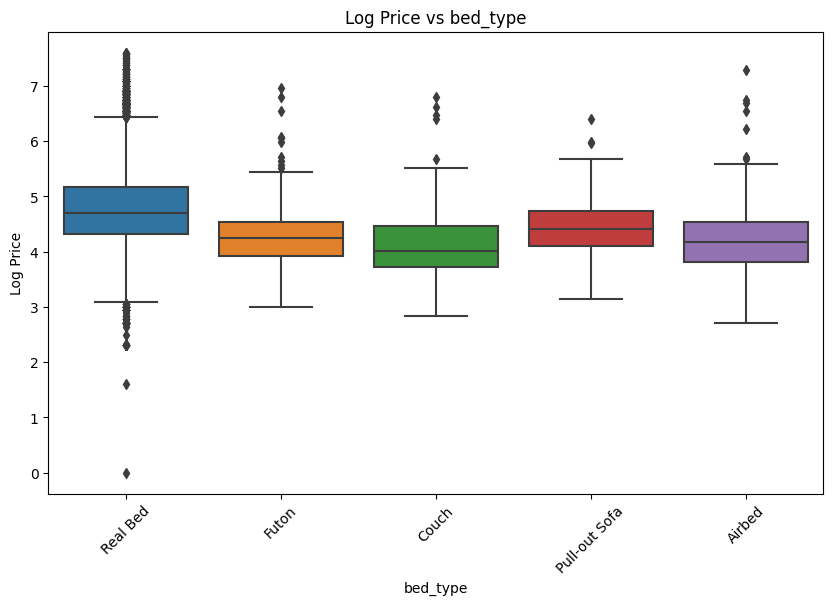

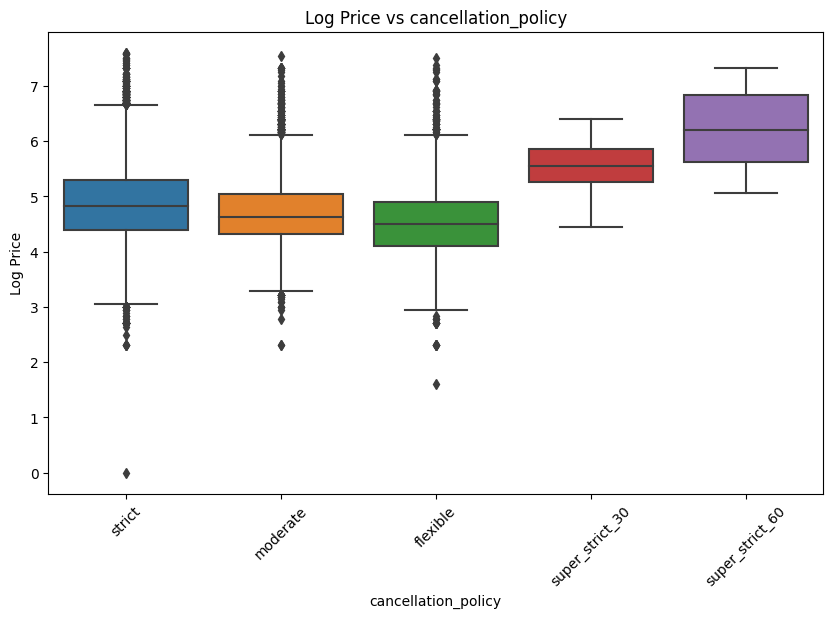

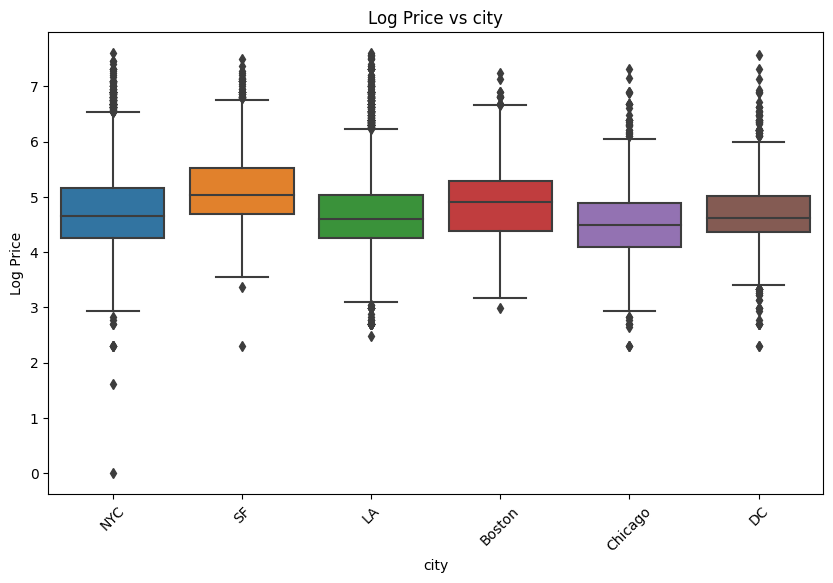

In [21]:
# Box plot of log_price vs. categorical features
categorical_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='log_price', data=df)
    plt.title(f'Log Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Log Price')
    plt.xticks(rotation=45)
    plt.show()

### Task: 3 Geospatial Analysis:

In [22]:
# importing library
import folium

In [23]:
# Create a map centered at the mean latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for each listing with price information
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Price: {row['log_price']}").add_to(m)

In [ ]:
# Display the map
m.save("listings_map.html")

### Task:4 Sentiment Analysis on Textual Data

- first i have done using textblob then to compare it with more optimize technique i have done vader technique

In [24]:
# importing libraries for this task
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Apply sentiment analysis using TextBlob
def get_sentiment_textblob(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

# Apply sentiment analysis using VADER
def get_sentiment_vader(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores['compound']

In [26]:
df['Description_Sentiment_TextBlob'] = df['description'].apply(get_sentiment_textblob)

In [28]:
# Calculate sentiment scores for each description
df['Description_Sentiment_VADER'] = df['description'].apply(get_sentiment_vader)

In [29]:
# Split the dataset into training and testing sets
X = df[['Description_Sentiment_TextBlob', 'Description_Sentiment_VADER']]  # Features
y = df['log_price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [32]:
# Evaluate the mode
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.4371583497670888
R-squared: 0.0076274482515593656


### task:5

In [34]:
# Parse the amenities column
df['amenities'] = df['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))

In [35]:
# Create binary columns for each amenity
amenities_list = set([item for sublist in df['amenities'] for item in sublist])
for amenity in amenities_list:
    df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)

C:\Users\Zainab\AppData\Local\Temp\ipykernel_8376\1621846905.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)
C:\Users\Zainab\AppData\Local\Temp\ipykernel_8376\1621846905.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)
C:\Users\Zainab\AppData\Local\Temp\ipykernel_8376\1621846905.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

In [36]:
print(amenities_list)

{'', 'Air conditioning', 'Hot water kettle', 'Buzzer/wireless intercom', 'Bathtub', 'Long term stays allowed', 'Fireplace guards', 'Smoking allowed', 'Wide doorway', 'Shampoo', 'Wide clearance to bed', 'Air purifier', 'Garden or backyard', 'High chair', 'Cable TV', 'Gym', 'Kitchen', 'Hot tub', 'Internet', 'Washer / Dryer', 'Lake access', 'Stair gates', 'Patio or balcony', 'Iron', 'Other', 'Breakfast', 'Accessible-height toilet', 'Lock on bedroom door', 'Coffee maker', 'Outlet covers', 'Lockbox', 'Wide clearance to shower and toilet', 'Private living room', 'Disabled parking spot', 'Family/kid friendly', 'Fixed grab bars for shower & toilet', 'Pets allowed', 'Elevator in building', 'Crib', 'Carbon monoxide detector', 'BBQ grill', 'Hangers', 'First aid kit', 'Roll-in shower with chair', 'Ski in/Ski out', 'Washer', 'Refrigerator', 'Self Check-In', 'Smart lock', 'Dryer', 'Doorman Entry', 'Smartlock', 'Well-lit path to entrance', 'Keypad', 'Suitable for events', 'Table corner guards', 'Wide

In [37]:
import numpy as np
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

In [38]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = df.columns.difference(non_numeric_columns)
amenities_correlation = df[numeric_columns].corr()['log_price'].sort_values(ascending=False)

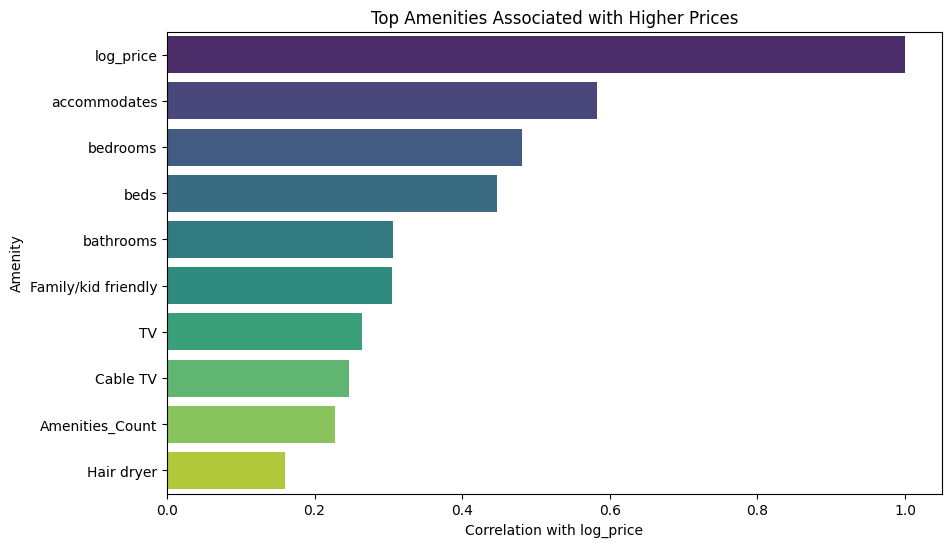

In [40]:
# Visualize the top amenities associated with higher prices
top_amenities_higher_prices = amenities_correlation.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_amenities_higher_prices.values, y=top_amenities_higher_prices.index, palette='viridis')
plt.xlabel('Correlation with log_price')
plt.ylabel('Amenity')
plt.title('Top Amenities Associated with Higher Prices')
plt.show()

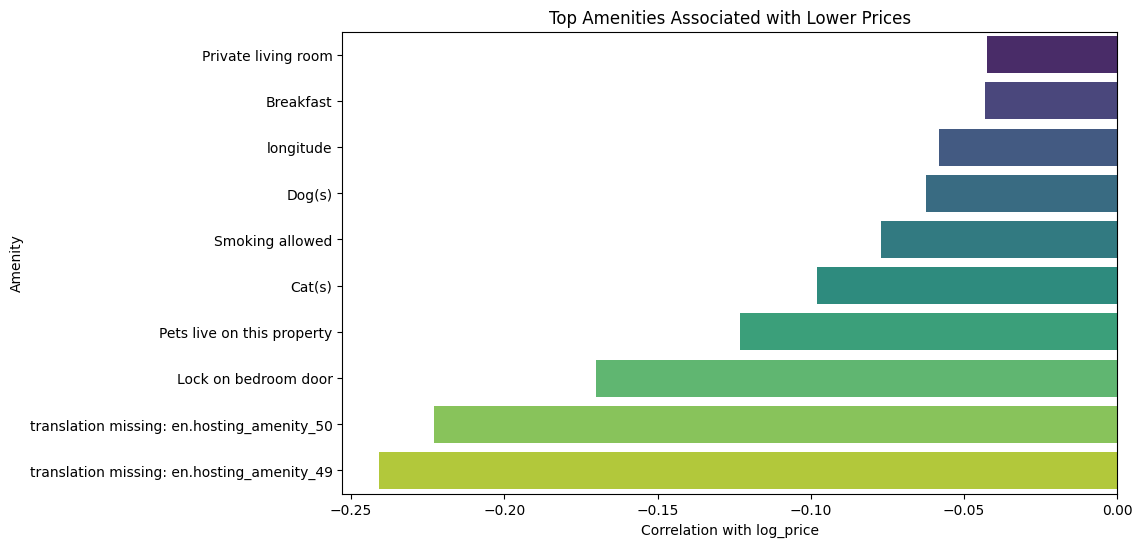

In [41]:
# Visualize the top amenities associated with lower prices
top_amenities_lower_prices = amenities_correlation.tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_amenities_lower_prices.values, y=top_amenities_lower_prices.index, palette='viridis')
plt.xlabel('Correlation with log_price')
plt.ylabel('Amenity')
plt.title('Top Amenities Associated with Lower Prices')
plt.show()

### task:6 Categorical Data Encoding: 

In [42]:
# Identify categorical variables for one-hot encoding
categorical_vars = ['room_type', 'city', 'property_type']

In [43]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   log_price                                          amenities  accommodates   
1   5.129899  [Wireless Internet, Air conditioning, Kitchen,...             7  \
2   4.976734  [TV, Cable TV, Wireless Internet, Air conditio...             5   
5   4.442651  [TV, Wireless Internet, Heating, Smoke detecto...             2   
7   4.787492  [TV, Cable TV, Wireless Internet, Wheelchair a...             2   
8   4.787492  [TV, Cable TV, Wireless Internet, Pets live on...             2   

   bathrooms  bed_type cancellation_policy  cleaning_fee   
1        1.0  Real Bed              strict          True  \
2        1.0  Real Bed            moderate          True   
5        1.0  Real Bed              strict          True   
7        1.0  Real Bed            moderate          True   
8        1.0  Real Bed            moderate          True   

                                         description first_review   
1  Enjoy travelling during your stay in Manhattan...   2017-08-05  \
2  The Oasis c

In [44]:
# Save the encoded DataFrame to a new Excel file
df_encoded.to_excel("Homestays_Data_Encoded.xlsx", index=False)

### task:7  Model Development and Training: 

In [41]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [42]:
# Load the dataset
df = pd.read_excel("Homestays_Data_Encoded.xlsx")

# Prepare data
X = df.drop(columns=['log_price'])
y = df['log_price']

In [43]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Convert boolean columns to numeric
boolean_columns = X_train.select_dtypes(include=bool).columns
X_train[boolean_columns] = X_train[boolean_columns].astype(int)

# Check the data types again
print(X_train.dtypes)

amenities                       object
accommodates                     int64
bathrooms                      float64
bed_type                        object
cancellation_policy             object
                                ...   
property_type_Train              int32
property_type_Treehouse          int32
property_type_Vacation home      int32
property_type_Villa              int32
property_type_Yurt               int32
Length: 196, dtype: object


In [45]:
print(X_train.dtypes)

amenities                       object
accommodates                     int64
bathrooms                      float64
bed_type                        object
cancellation_policy             object
                                ...   
property_type_Train              int32
property_type_Treehouse          int32
property_type_Vacation home      int32
property_type_Villa              int32
property_type_Yurt               int32
Length: 196, dtype: object


In [46]:
print(y_train.dtypes)

float64


In [ ]:
# Define preprocessing steps
categorical_cols = ['amenities', 'bed_type', 'cancellation_policy']  # Add other categorical columns if needed
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)

In [47]:
# Define models
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42))
]


C:\Users\Zainab\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Train and evaluate models
for name, model in models:
    print(f"Training {name}...")
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name} RMSE: {rmse:.4f}")

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the pipelines for different models
pipelines = {
    'Linear Regression': Pipeline([('regressor', LinearRegression())]),
    'Random Forest': Pipeline([('regressor', RandomForestRegressor())]),
    'Gradient Boosting': Pipeline([('regressor', GradientBoostingRegressor())])
}

In [ ]:
# Define the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search and cross-validation for each model
best_models = {}
for name, pipeline in pipelines.items():
    print(f"Optimizing {name}...")
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

In [ ]:
# Evaluate the best models on the test set
print("\nEvaluating best models on the test set...")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name} RMSE: {rmse}")

### Task 9

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance for Random Forest
rf_feature_importance = best_models['Random Forest'].named_steps['regressor'].feature_importances_

# Get feature importance for Gradient Boosting
gb_feature_importance = best_models['Gradient Boosting'].named_steps['regressor'].feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Random Forest Importance': rf_feature_importance,
    'Gradient Boosting Importance': gb_feature_importance
})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Random Forest Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Random Forest Importance'][:10], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Features by Random Forest Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import shap

# Explain the model predictions using SHAP values for the best Gradient Boosting model
explainer = shap.Explainer(best_models['Gradient Boosting'])
shap_values = explainer(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)


### Task 10

In [ ]:
# Get predictions from the final model
final_model = best_models['Gradient Boosting']  # Assuming Gradient Boosting is the final model
final_predictions = final_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

# Calculate R-squared
r_squared = r2_score(y_test, final_predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

# Analyze residuals
residuals = y_test - final_predictions


In [ ]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(final_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted log_price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()